## CLV Using Regression Models


In [ ]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

In [ ]:
#accessing files from google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading the excel file
df1 = pd.read_excel('/content/drive/MyDrive/online_retail_data1.xlsx')
df2 = pd.read_excel('/content/drive/MyDrive/online_retail_data2.xlsx')
df3 = pd.read_csv('/content/drive/MyDrive/Predicted CLV Results.csv')

In [ ]:
df3.head()

,Unnamed: 0,Customer ID,BG-NBD,Pareto-NBD,MBG-NBD
0,0,12347.0,7110.166375,6427.083703,7003.290033
1,1,12348.0,2512.081673,2243.170549,2522.287420
2,2,12349.0,3449.798774,3184.476671,3504.589499
3,3,12352.0,3100.010138,2760.845696,3031.895454
4,4,12353.0,536.035114,474.570351,585.402211


In [ ]:
#Merging 2 files
df = df1._append(df2)
df = df.drop("Country",axis=1)
df.shape

(1067371, 7)

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0


In [ ]:
#Checking for null values
df.isnull().sum()/df.shape[0]*100

Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
dtype: float64

In [ ]:
# first drop the rows where the description is null
df.dropna(axis = 0, subset = ["Description"], inplace = True)

In [ ]:
#Now let's check the data before droping these customer ID's
df.isnull().sum()

Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    238625
dtype: int64

In [ ]:
df.drop(['StockCode','Description'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062989 entries, 0 to 541909
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1062989 non-null  object        
 1   Quantity     1062989 non-null  int64         
 2   InvoiceDate  1062989 non-null  datetime64[ns]
 3   Price        1062989 non-null  float64       
 4   Customer ID  824364 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 48.7+ MB


In [ ]:
df.head()

,Invoice,Quantity,InvoiceDate,Price,Customer ID
0,489434,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,24,2009-12-01 07:45:00,1.25,13085.0


In [ ]:
df=df.rename(columns={'CustomerID': 'ID_OF_CUSTOMER', 'InvoiceNo': 'NUMBER_OF_INVOICE',
                       'InvoiceDate': 'DATE_OF_INVOICE', 'Quantity': 'QUANTITY',
                       'UnitPrice': 'PRICE_OF_UNIT'})
df.head()

,Invoice,QUANTITY,DATE_OF_INVOICE,Price,Customer ID
0,489434,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,24,2009-12-01 07:45:00,1.25,13085.0


In [ ]:
# Calulate total purchase
df['TOTAL_PURCHASE'] = df['QUANTITY'] * df['Price']
df.head()

,Invoice,QUANTITY,DATE_OF_INVOICE,Price,Customer ID,TOTAL_PURCHASE
0,489434,12,2009-12-01 07:45:00,6.95,13085.0,83.4
1,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.0
2,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.0
3,489434,48,2009-12-01 07:45:00,2.10,13085.0,100.8
4,489434,24,2009-12-01 07:45:00,1.25,13085.0,30.0


In [ ]:
# Converting Pandas Series to DateTime in a DataFrame
df['DATE_OF_INVOICE']=pd.to_datetime(df['DATE_OF_INVOICE'])
df.head()

,Invoice,QUANTITY,DATE_OF_INVOICE,Price,Customer ID,TOTAL_PURCHASE
0,489434,12,2009-12-01 07:45:00,6.95,13085.0,83.4
1,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.0
2,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.0
3,489434,48,2009-12-01 07:45:00,2.10,13085.0,100.8
4,489434,24,2009-12-01 07:45:00,1.25,13085.0,30.0


In [ ]:
# Extract month and year from InvoiceDate.
df['MONTH_BY_YEAR'] = df['DATE_OF_INVOICE'].apply(lambda x: x.strftime('%b-%Y'))
df.head()

,Invoice,QUANTITY,DATE_OF_INVOICE,Price,Customer ID,TOTAL_PURCHASE,MONTH_BY_YEAR
0,489434,12,2009-12-01 07:45:00,6.95,13085.0,83.4,Dec-2009
1,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.0,Dec-2009
2,489434,12,2009-12-01 07:45:00,6.75,13085.0,81.0,Dec-2009
3,489434,48,2009-12-01 07:45:00,2.10,13085.0,100.8,Dec-2009
4,489434,24,2009-12-01 07:45:00,1.25,13085.0,30.0,Dec-2009


In [ ]:
# total purchase amounts for each customer across different month-year periods
SALES=df.pivot_table(index=['Customer ID'],columns=['MONTH_BY_YEAR'],values='TOTAL_PURCHASE',aggfunc='sum',fill_value=0).reset_index()
SALES.head()

MONTH_BY_YEAR,Customer ID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2010,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011
0,12346.0,0.00,0.00,0.0,0.00,113.50,0.00,0.00,0.0,0.0,...,27.05,0.0,0.0,0.0,0.0,0.00,-5.50,0.00,0.00,0.0
1,12347.0,0.00,636.25,0.0,584.91,0.00,1423.58,224.82,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0
2,12348.0,0.00,367.00,0.0,0.00,0.00,892.80,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0
3,12349.0,1068.52,0.00,0.0,0.00,-24.15,0.00,0.00,0.0,0.0,...,0.00,0.0,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0
4,12350.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,334.4,...,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0


In [ ]:
SALES.shape

(5942, 26)

In [ ]:
df3.shape

(4185, 5)

In [ ]:
SALES.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Customer ID  5942 non-null   float64
 1   Apr-2010     5942 non-null   float64
 2   Apr-2011     5942 non-null   float64
 3   Aug-2010     5942 non-null   float64
 4   Aug-2011     5942 non-null   float64
 5   Dec-2009     5942 non-null   float64
 6   Dec-2010     5942 non-null   float64
 7   Dec-2011     5942 non-null   float64
 8   Feb-2010     5942 non-null   float64
 9   Feb-2011     5942 non-null   float64
 10  Jan-2010     5942 non-null   float64
 11  Jan-2011     5942 non-null   float64
 12  Jul-2010     5942 non-null   float64
 13  Jul-2011     5942 non-null   float64
 14  Jun-2010     5942 non-null   float64
 15  Jun-2011     5942 non-null   float64
 16  Mar-2010     5942 non-null   float64
 17  Mar-2011     5942 non-null   float64
 18  May-2010     5942 non-null   float64
 19  May-20

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4185 entries, 0 to 4184
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4185 non-null   int64  
 1   Customer ID  4185 non-null   float64
 2   BG-NBD       4185 non-null   float64
 3   Pareto-NBD   4185 non-null   float64
 4   MBG-NBD      4185 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 163.6 KB


In [ ]:
# Giving the CLV values predicted in previous code
merged_df = pd.merge(SALES, df3, on='Customer ID', how='left')
# Assign 'BG-NBD' values to 'CLV' where 'Customer ID' matches, else assign 0
merged_df['CLV'] = merged_df['BG-NBD'].fillna(0)
# Update SALES DataFrame with the 'CLV' values
SALES['CLV'] = merged_df['CLV']

In [ ]:
SALES.head()

MONTH_BY_YEAR,Customer ID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLV
0,12346.0,0.00,0.00,0.0,0.00,113.50,0.00,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,-5.50,0.00,0.00,0.0,0.000000
1,12347.0,0.00,636.25,0.0,584.91,0.00,1423.58,224.82,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0,7110.166375
2,12348.0,0.00,367.00,0.0,0.00,0.00,892.80,0.00,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0,2512.081673
3,12349.0,1068.52,0.00,0.0,0.00,-24.15,0.00,0.00,0.0,0.0,...,0.0,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0,3449.798774
4,12350.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,334.4,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.000000


In [ ]:
#Removing the rows having CLV as zero
SALES = SALES[SALES['CLV'] != 0]

In [ ]:
SALES.head()

MONTH_BY_YEAR,Customer ID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLV
1,12347.0,0.00,636.25,0.0,584.91,0.00,1423.58,224.82,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0,7110.166375
2,12348.0,0.00,367.00,0.0,0.00,0.00,892.80,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0,2512.081673
3,12349.0,1068.52,0.00,0.0,0.00,-24.15,0.00,0.00,0.0,0.0,...,0.00,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0,3449.798774
6,12352.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,296.5,...,304.68,0.0,0.0,343.8,311.73,0.00,0.00,0.00,632.5,3100.010138
7,12353.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.00,0.0,89.0,0.0,0.00,317.76,0.00,0.00,0.0,536.035114


<ipython-input-25-e5354e941427>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(SALES['CLV'],kde=True)


<Axes: xlabel='CLV', ylabel='Density'>

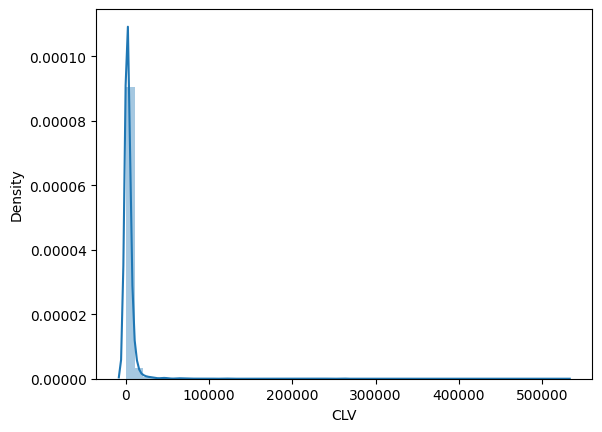

In [ ]:
#distribution of CLV
sns.distplot(SALES['CLV'],kde=True)

In [ ]:
SALES['CLV'].describe()

count    4.185000e+03
mean     3.761855e+03
std      1.507479e+04
min      3.686277e-07
25%      7.003392e+02
50%      1.592964e+03
75%      3.491256e+03
max      5.245914e+05
Name: CLV, dtype: float64

In [ ]:
df4 = SALES[['Customer ID','Apr-2010','Apr-2011',	'Aug-2010','Aug-2011','Dec-2009',	'Dec-2010',	'Dec-2011','Feb-2010',	'Feb-2011','Jan-2010','Jan-2011',	'Jul-2010','Jul-2011','Jun-2010',	'Jun-2011',	'Mar-2010','Mar-2011','May-2010','May-2011','Nov-2010','Nov-2011','Oct-2010',	'Oct-2011','Sep-2010','Sep-2011','CLV']]
df4.head()

MONTH_BY_YEAR,Customer ID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLV
1,12347.0,0.00,636.25,0.0,584.91,0.00,1423.58,224.82,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0,7110.166375
2,12348.0,0.00,367.00,0.0,0.00,0.00,892.80,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0,2512.081673
3,12349.0,1068.52,0.00,0.0,0.00,-24.15,0.00,0.00,0.0,0.0,...,0.00,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0,3449.798774
6,12352.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,296.5,...,304.68,0.0,0.0,343.8,311.73,0.00,0.00,0.00,632.5,3100.010138
7,12353.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.00,0.0,89.0,0.0,0.00,317.76,0.00,0.00,0.0,536.035114


In [ ]:
df5 = pd.DataFrame({'Customer ID': SALES['Customer ID'],
'Apr-2010':SALES['Apr-2010'],
'Apr-2011': SALES['Apr-2011'],
'Aug-2010':SALES['Aug-2010'],
'Aug-2011': SALES['Aug-2011'],
'Dec-2009': SALES['Dec-2009'],
'Dec-2010': SALES['Dec-2010'],
'Dec-2011': SALES['Dec-2011'],
'Feb-2010': SALES['Feb-2010'],
'Feb-2011': SALES['Feb-2011'],
'Jan-2010':SALES['Jan-2010'],
'Jan-2011': SALES['Jan-2011'],
'Jul-2010':SALES['Jul-2010'],
'Jul-2011': SALES['Jul-2011'],
'Jun-2010':SALES['Jun-2010'],
'Jun-2011': SALES['Jun-2011'],
'Mar-2010':SALES['Mar-2010'],
'Mar-2011': SALES['Mar-2011'],
'May-2010':SALES['May-2010'],
'May-2011': SALES['May-2011'],
'Nov-2010':SALES['Nov-2010'],
'Nov-2011': SALES['Nov-2011'],
'Oct-2010':SALES['Oct-2010'],
'Oct-2011': SALES['Oct-2011'],
'Sep-2010':SALES['Sep-2010'],
'Sep-2011': SALES['Sep-2011'],
'CLV': SALES['CLV']})
df5.head()

,Customer ID,Apr-2010,Apr-2011,Aug-2010,Aug-2011,Dec-2009,Dec-2010,Dec-2011,Feb-2010,Feb-2011,...,Mar-2011,May-2010,May-2011,Nov-2010,Nov-2011,Oct-2010,Oct-2011,Sep-2010,Sep-2011,CLV
1,12347.0,0.00,636.25,0.0,584.91,0.00,1423.58,224.82,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,611.53,1294.32,0.00,0.0,7110.166375
2,12348.0,0.00,367.00,0.0,0.00,0.00,892.80,0.00,0.0,0.0,...,0.00,0.0,0.0,0.0,0.00,0.00,0.00,222.16,310.0,2512.081673
3,12349.0,1068.52,0.00,0.0,0.00,-24.15,0.00,0.00,0.0,0.0,...,0.00,200.0,0.0,0.0,1757.55,1402.62,0.00,0.00,0.0,3449.798774
6,12352.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,296.5,...,304.68,0.0,0.0,343.8,311.73,0.00,0.00,0.00,632.5,3100.010138
7,12353.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,...,0.00,0.0,89.0,0.0,0.00,317.76,0.00,0.00,0.0,536.035114


In [ ]:
SALES.to_csv("abc.csv")

## Modeling

### Linear Regression

In [ ]:
df5.columns

Index(['Customer ID', 'Apr-2010', 'Apr-2011', 'Aug-2010', 'Aug-2011',
       'Dec-2009', 'Dec-2010', 'Dec-2011', 'Feb-2010', 'Feb-2011', 'Jan-2010',
       'Jan-2011', 'Jul-2010', 'Jul-2011', 'Jun-2010', 'Jun-2011', 'Mar-2010',
       'Mar-2011', 'May-2010', 'May-2011', 'Nov-2010', 'Nov-2011', 'Oct-2010',
       'Oct-2011', 'Sep-2010', 'Sep-2011', 'CLV'],
      dtype='object')

In [ ]:
#defining Input variables and output
X=df5[ [ 'Apr-2010', 'Apr-2011', 'Aug-2010', 'Aug-2011',
       'Dec-2009', 'Dec-2010', 'Dec-2011', 'Feb-2010', 'Feb-2011', 'Jan-2010',
       'Jan-2011', 'Jul-2010', 'Jul-2011', 'Jun-2010', 'Jun-2011', 'Mar-2010',
       'Mar-2011', 'May-2010', 'May-2011', 'Nov-2010', 'Nov-2011', 'Oct-2010',
       'Oct-2011', 'Sep-2010', 'Sep-2011']]#'Customer ID',
y=df5[ ['CLV']]

In [ ]:
#Building Linear Regression Model
import statsmodels.api as st
X1 = st.add_constant(X)
reg_model=st.OLS(y,X1)
result=reg_model.fit()
print(result.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.983     
Dependent Variable: CLV              AIC:                75469.7167
Date:               2023-12-06 15:19 BIC:                75634.5375
No. Observations:   4185             Log-Likelihood:     -37709.   
Df Model:           25               F-statistic:        9461.     
Df Residuals:       4159             Prob (F-statistic): 0.00      
R-squared:          0.983            Scale:              3.9504e+06
--------------------------------------------------------------------
              Coef.    Std.Err.     t     P>|t|    [0.025    0.975] 
--------------------------------------------------------------------
const        397.7271   32.8016  12.1252  0.0000  333.4184  462.0358
Apr-2010       0.4506    0.0816   5.5186  0.0000    0.2905    0.6106
Apr-2011       0.9781    0.1016   9.6259  0.0000    0.7789    1.1774
Aug-2010       0.1706    0.0829   2.0569  0.0398    0.0080  

In [ ]:
# Spliting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)#,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
X_train1 = st.add_constant(X_train)
reg_model=st.OLS(y_train,X_train1)
result=reg_model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    CLV   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     7304.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:19:51   Log-Likelihood:                -26336.
No. Observations:                2929   AIC:                         5.272e+04
Df Residuals:                    2903   BIC:                         5.288e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        351.7924     39.027      9.014      0.0

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred_regressor = regressor.predict(X_test)

In [ ]:
regressor_r = regressor.score(X_test, y_test)
print("Linear Regression R squared:","{:.2%}".format(regressor_r))

Linear Regression R squared: 94.24%


In [ ]:
regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)
print('Linear Regression RMSE: %.4f' % regressor_rmse)

Linear Regression RMSE: 3341.1569


In [ ]:
#print metric to get performance
regressor_accuracy=regressor.score(X_test,y_test)*100
print("Linear Regression Accuracy: %.4f" % regressor_accuracy)

Linear Regression Accuracy: 94.2400


In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
from sklearn.model_selection import cross_val_score
results=cross_val_score(regressor,X,y,cv=kfold_validation)
print(results)
print("Linear Regression Accuracy through K-fold Cross Validation: %.4f" % (np.mean(results)*100))

[0.91512305 0.96298803 0.82769545 0.97073591 0.95746239 0.96445538
 0.91302263 0.91741862 0.93525378 0.97764525]
Linear Regression Accuracy through K-fold Cross Validation: 93.4180


### KNN Regressor

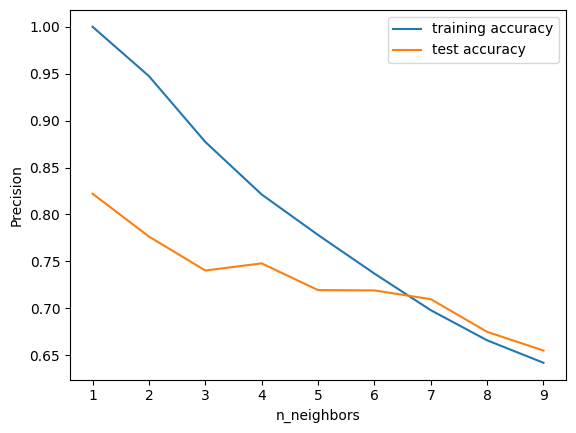

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
training_precision = []
test_precision = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 10)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set precision
    training_precision.append(knn.score(X_train, y_train))
    # record test set precision
    test_precision.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_precision, label="training accuracy")
plt.plot(neighbors_settings, test_precision, label="test accuracy")
plt.ylabel("Precision")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

In [ ]:
knn1 = KNeighborsRegressor(n_neighbors=1)
knn1.fit(X_train, y_train)
knn2 = KNeighborsRegressor(n_neighbors=2)
knn2.fit(X_train, y_train)
knn3 = KNeighborsRegressor(n_neighbors=3)
knn3.fit(X_train, y_train)
knn4 = KNeighborsRegressor(n_neighbors=4)
knn4.fit(X_train, y_train)
knn5 = KNeighborsRegressor(n_neighbors=5)
knn5.fit(X_train, y_train)
knn6 = KNeighborsRegressor(n_neighbors=6)
knn6.fit(X_train, y_train)
knn7 = KNeighborsRegressor(n_neighbors=7)
knn7.fit(X_train, y_train)
knn8 = KNeighborsRegressor(n_neighbors=8)
knn8.fit(X_train, y_train)
knn9 = KNeighborsRegressor(n_neighbors=9)
knn9.fit(X_train, y_train)
knn10 = KNeighborsRegressor(n_neighbors=10)
knn10.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_pred_knn1 = knn1.predict(X_test)
y_pred_knn2 = knn2.predict(X_test)
y_pred_knn3 = knn3.predict(X_test)
y_pred_knn4 = knn4.predict(X_test)
y_pred_knn5 = knn5.predict(X_test)
y_pred_knn6 = knn6.predict(X_test)
y_pred_knn7 = knn7.predict(X_test)
y_pred_knn8 = knn8.predict(X_test)
y_pred_knn9 = knn9.predict(X_test)
y_pred_knn10 = knn10.predict(X_test)

In [ ]:
knn_r1 = knn1.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 1 nearest neighbour:","{:.2%}".format(knn_r1))
knn_r2 = knn2.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 2 nearest neighbour:","{:.2%}".format(knn_r2))
knn_r3 = knn3.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 3 nearest neighbour:","{:.2%}".format(knn_r3))
knn_r4 = knn4.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 4 nearest neighbour:","{:.2%}".format(knn_r4))
knn_r5 = knn5.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 5 nearest neighbour:","{:.2%}".format(knn_r5))
knn_r6 = knn6.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 6 nearest neighbour:","{:.2%}".format(knn_r6))
knn_r7 = knn7.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 7 nearest neighbour:","{:.2%}".format(knn_r7))
knn_r8 = knn8.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 8 nearest neighbour:","{:.2%}".format(knn_r8))
knn_r9 = knn9.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 9 nearest neighbour:","{:.2%}".format(knn_r9))
knn_r10 = knn10.score(X_test, y_test)
print("K-Nearest Neighbors R squared for 10 nearest neighbour:","{:.2%}".format(knn_r10))

K-Nearest Neighbors R squared for 1 nearest neighbour: 82.21%
K-Nearest Neighbors R squared for 2 nearest neighbour: 77.65%
K-Nearest Neighbors R squared for 3 nearest neighbour: 74.03%
K-Nearest Neighbors R squared for 4 nearest neighbour: 74.79%
K-Nearest Neighbors R squared for 5 nearest neighbour: 71.94%
K-Nearest Neighbors R squared for 6 nearest neighbour: 71.91%
K-Nearest Neighbors R squared for 7 nearest neighbour: 70.98%
K-Nearest Neighbors R squared for 8 nearest neighbour: 67.49%
K-Nearest Neighbors R squared for 9 nearest neighbour: 65.50%
K-Nearest Neighbors R squared for 10 nearest neighbour: 64.10%


In [ ]:
knn_accuracy1 = knn1.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 1 nearest neighbour: %.4f" % knn_accuracy1)
knn_accuracy2 = knn2.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 2 nearest neighbour: %.4f" % knn_accuracy2)
knn_accuracy3 = knn3.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 3 nearest neighbour: %.4f" % knn_accuracy3)
knn_accuracy4 = knn4.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 4 nearest neighbour: %.4f" % knn_accuracy4)
knn_accuracy5 = knn5.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 5 nearest neighbour: %.4f" % knn_accuracy5)
knn_accuracy6 = knn6.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 6 nearest neighbour: %.4f" % knn_accuracy6)
knn_accuracy7 = knn7.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 7 nearest neighbour: %.4f" % knn_accuracy7)
knn_accuracy8 = knn8.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 8 nearest neighbour: %.4f" % knn_accuracy8)
knn_accuracy9 = knn9.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 9 nearest neighbour: %.4f" % knn_accuracy9)
knn_accuracy10 = knn10.score(X_test,y_test)*100
print("K-Nearest Neighbors Accuracy for 10 nearest neighbour: %.4f" % knn_accuracy10)

K-Nearest Neighbors Accuracy for 1 nearest neighbour: 82.2104
K-Nearest Neighbors Accuracy for 2 nearest neighbour: 77.6490
K-Nearest Neighbors Accuracy for 3 nearest neighbour: 74.0313
K-Nearest Neighbors Accuracy for 4 nearest neighbour: 74.7902
K-Nearest Neighbors Accuracy for 5 nearest neighbour: 71.9431
K-Nearest Neighbors Accuracy for 6 nearest neighbour: 71.9104
K-Nearest Neighbors Accuracy for 7 nearest neighbour: 70.9771
K-Nearest Neighbors Accuracy for 8 nearest neighbour: 67.4940
K-Nearest Neighbors Accuracy for 9 nearest neighbour: 65.5019
K-Nearest Neighbors Accuracy for 10 nearest neighbour: 64.0965


In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
from sklearn.model_selection import cross_val_score
results1=cross_val_score(knn1,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 1 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results1)*100))
results2=cross_val_score(knn2,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 2 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results2)*100))
results3=cross_val_score(knn3,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 3 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results3)*100))
results4=cross_val_score(knn4,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 4 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results4)*100))
results5=cross_val_score(knn5,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 5 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results5)*100))
results6=cross_val_score(knn6,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 6 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results6)*100))
results7=cross_val_score(knn7,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 7 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results7)*100))
results8=cross_val_score(knn8,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 8 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results8)*100))
results9=cross_val_score(knn9,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 9 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results9)*100))
results10=cross_val_score(knn10,X,y,cv=kfold_validation)
print("K-Nearest Neighbors Accuracy for 10 nearest neighbour through K-fold Cross Validation: %.4f" % (np.mean(results10)*100))

K-Nearest Neighbors Accuracy for 1 nearest neighbour through K-fold Cross Validation: 78.4042
K-Nearest Neighbors Accuracy for 2 nearest neighbour through K-fold Cross Validation: 78.6849
K-Nearest Neighbors Accuracy for 3 nearest neighbour through K-fold Cross Validation: 78.8227
K-Nearest Neighbors Accuracy for 4 nearest neighbour through K-fold Cross Validation: 78.1952
K-Nearest Neighbors Accuracy for 5 nearest neighbour through K-fold Cross Validation: 76.7705
K-Nearest Neighbors Accuracy for 6 nearest neighbour through K-fold Cross Validation: 75.5317
K-Nearest Neighbors Accuracy for 7 nearest neighbour through K-fold Cross Validation: 73.8913
K-Nearest Neighbors Accuracy for 8 nearest neighbour through K-fold Cross Validation: 72.6915
K-Nearest Neighbors Accuracy for 9 nearest neighbour through K-fold Cross Validation: 71.3720
K-Nearest Neighbors Accuracy for 10 nearest neighbour through K-fold Cross Validation: 70.1482


### SVM Regressor

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
y_pred_svr = svr.predict(X_test)

In [ ]:
svr_r = svr.score(X_test, y_test)
print("Support Vector Machine R squared:","{:.2%}".format(svr_r))

Support Vector Machine R squared: -1.82%


In [ ]:
svr_mse = mean_squared_error(y_pred_svr, y_test)
svr_rmse = np.sqrt(svr_mse)
print('Support Vector Machine RMSE: %.4f' % svr_rmse)

Support Vector Machine RMSE: 14047.5147


In [ ]:
#print metric to get performance
svr_accuracy = svr.score(X_test,y_test)*100
print("Support Vector Machine Accuracy: %.4f" %svr_accuracy)

Support Vector Machine Accuracy: -1.8185


In [ ]:
results_svr=cross_val_score(svr,X,y,cv=kfold_validation)
print(results_svr)
print("Support Vector Machine Accuracy through K-fold Cross Validation: %.4f" % (np.mean(results_svr)*100))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

[-0.07686309 -0.04832557 -0.02614176 -0.01193295 -0.01839943 -0.03266874
 -0.03876344 -0.02540496 -0.01645685 -0.00936264]
Support Vector Machine Accuracy through K-fold Cross Validation: -3.0432


### Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
y_pred_dt = dt.predict(X_test)

In [ ]:
dt_r = dt.score(X_test, y_test)
print("Decision Tree R squared:","{:.2%}".format(dt_r))

Decision Tree R squared: 31.59%


In [ ]:
dt_mse = mean_squared_error(y_pred_dt, y_test)
dt_rmse = np.sqrt(dt_mse)
print('Decision Tree RMSE: %.4f' % dt_rmse)

Decision Tree RMSE: 11514.3578


In [ ]:
#print metric to get performance
dt_accuracy=dt.score(X_test,y_test)*100
print("Decision Tree Accuracy: %.4f" %dt_accuracy)

Decision Tree Accuracy: 31.5920


In [ ]:
results_dt=cross_val_score(dt,X,y,cv=kfold_validation)
print(results_dt)
print("Decision Tree Accuracy through K-fold Cross Validation: %.4f" % (np.mean(results_dt)*100))

[0.74805222 0.67555471 0.46640403 0.87319732 0.32007836 0.56281945
 0.82288378 0.87820177 0.92418651 0.59748138]
Decision Tree Accuracy through K-fold Cross Validation: 68.6886


### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf1 = RandomForestRegressor(n_estimators=50, random_state=42)
rf1.fit(X_train, y_train)
rf2 = RandomForestRegressor(n_estimators=100, random_state=42)
rf2.fit(X_train, y_train)
rf3 = RandomForestRegressor(n_estimators=150, random_state=42)
rf3.fit(X_train, y_train)
rf4 = RandomForestRegressor(n_estimators=200, random_state=42)
rf4.fit(X_train, y_train)
rf5 = RandomForestRegressor(n_estimators=250, random_state=42)
rf5.fit(X_train, y_train)
rf6 = RandomForestRegressor(n_estimators=300, random_state=42)
rf6.fit(X_train, y_train)

<ipython-input-60-9bf5f3e3e7b7>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)
<ipython-input-60-9bf5f3e3e7b7>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf2.fit(X_train, y_train)
<ipython-input-60-9bf5f3e3e7b7>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf3.fit(X_train, y_train)
<ipython-input-60-9bf5f3e3e7b7>:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf4.fit(X_train, y_train)
<ipython-input-60-9bf5f3e3e7b7>:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please cha

RandomForestRegressor(n_estimators=300, random_state=42)

In [ ]:
y_pred_rf1 = rf1.predict(X_test)
y_pred_rf2 = rf2.predict(X_test)
y_pred_rf3 = rf3.predict(X_test)
y_pred_rf4 = rf4.predict(X_test)
y_pred_rf5 = rf5.predict(X_test)
y_pred_rf6 = rf6.predict(X_test)

In [ ]:
rf_accuracy1 = rf1.score(X_test,y_test)*100
print("Random Forest Accuracy for 50 estimators: %.4f" %rf_accuracy1)
rf_accuracy2 = rf2.score(X_test,y_test)*100
print("Random Forest Accuracy for 100 estimators: %.4f" %rf_accuracy2)
rf_accuracy3 = rf3.score(X_test,y_test)*100
print("Random Forest Accuracy for 150 estimators: %.4f" %rf_accuracy3)
rf_accuracy4 = rf4.score(X_test,y_test)*100
print("Random Forest Accuracy for 200 estimators: %.4f" %rf_accuracy4)
rf_accuracy5 = rf5.score(X_test,y_test)*100
print("Random Forest Accuracy for 250 estimators: %.4f" %rf_accuracy5)
rf_accuracy6 = rf6.score(X_test,y_test)*100
print("Random Forest Accuracy for 300 estimators: %.4f" %rf_accuracy6)

Random Forest Accuracy for 50 estimators: 83.4744
Random Forest Accuracy for 100 estimators: 86.3777
Random Forest Accuracy for 150 estimators: 85.6730
Random Forest Accuracy for 200 estimators: 85.3060
Random Forest Accuracy for 250 estimators: 86.3752
Random Forest Accuracy for 300 estimators: 86.9136


In [ ]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
from sklearn.model_selection import cross_val_score
results_rf1=cross_val_score(rf1,X,y,cv=kfold_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
results_rf2=cross_val_score(rf2,X,y,cv=kfold_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
results_rf3=cross_val_score(rf3,X,y,cv=kfold_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
results_rf4=cross_val_score(rf4,X,y,cv=kfold_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
results_rf5=cross_val_score(rf5,X,y,cv=kfold_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
results_rf6=cross_val_score(rf6,X,y,cv=kfold_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

In [ ]:
print("Random Forest Accuracy for 50 estimators through K-fold Cross Validation: %.4f" % (np.mean(results_rf1)*100))
print("Random Forest Accuracy for 100 estimators through K-fold Cross Validation: %.4f" % (np.mean(results_rf2)*100))
print("Random Forest Accuracy for 150 estimators through K-fold Cross Validation: %.4f" % (np.mean(results_rf3)*100))
print("Random Forest Accuracy for 200 estimators through K-fold Cross Validation: %.4f" % (np.mean(results_rf4)*100))
print("Random Forest Accuracy for 250 estimators through K-fold Cross Validation: %.4f" % (np.mean(results_rf5)*100))
print("Random Forest Accuracy for 300 estimators through K-fold Cross Validation: %.4f" % (np.mean(results_rf6)*100))

Random Forest Accuracy for 50 estimators through K-fold Cross Validation: 86.0694
Random Forest Accuracy for 100 estimators through K-fold Cross Validation: 86.0721
Random Forest Accuracy for 150 estimators through K-fold Cross Validation: 86.5737
Random Forest Accuracy for 200 estimators through K-fold Cross Validation: 86.4075
Random Forest Accuracy for 250 estimators through K-fold Cross Validation: 86.4771
Random Forest Accuracy for 300 estimators through K-fold Cross Validation: 86.5621


## Evalution

In [ ]:
models = ['Linear Regression','K-Nearest Neighbors(K=1)','K-Nearest Neighbors(K=2)','K-Nearest Neighbors(K=3)','K-Nearest Neighbors(K=4)','K-Nearest Neighbors(K=5)',
          'K-Nearest Neighbors(K=6)','K-Nearest Neighbors(K=7)','K-Nearest Neighbors(K=8)','K-Nearest Neighbors(K=9)','K-Nearest Neighbors(K=10)','Support Vector Machine',
          'Decision Tree','Random Forest(Estimators=50)','Random Forest(Estimators=100)','Random Forest(Estimators=150)','Random Forest(Estimators=200)',
          'Random Forest(Estimators=250)','Random Forest(Estimators=300)']
tests_accuracy = [(np.mean(results)*100), (np.mean(results1)*100),(np.mean(results2)*100),(np.mean(results3)*100),(np.mean(results4)*100),(np.mean(results5)*100),(np.mean(results6)*100),
                  (np.mean(results7)*100),(np.mean(results8)*100),(np.mean(results9)*100),(np.mean(results10)*100),(np.mean(results_svr)*100), (np.mean(results_dt)*100),
                  (np.mean(results_rf1)*100),(np.mean(results_rf2)*100),(np.mean(results_rf3)*100),(np.mean(results_rf4)*100),(np.mean(results_rf5)*100),(np.mean(results_rf6)*100) ]

In [ ]:
compare_models = pd.DataFrame({ "Algorithms": models, "Accuracy": tests_accuracy })
compare_models

,Algorithms,Accuracy
0,Linear Regression,93.418005
1,K-Nearest Neighbors(K=1),78.404233
2,K-Nearest Neighbors(K=2),78.684865
3,K-Nearest Neighbors(K=3),78.822651
4,K-Nearest Neighbors(K=4),78.195173
5,K-Nearest Neighbors(K=5),76.770495
6,K-Nearest Neighbors(K=6),75.531666
7,K-Nearest Neighbors(K=7),73.891271
8,K-Nearest Neighbors(K=8),72.691467
9,K-Nearest Neighbors(K=9),71.372031


In [ ]:
compare_models.sort_values(by = "Accuracy", ascending = False)

,Algorithms,Accuracy
0,Linear Regression,93.418005
15,Random Forest(Estimators=150),86.573666
18,Random Forest(Estimators=300),86.562072
17,Random Forest(Estimators=250),86.477140
16,Random Forest(Estimators=200),86.407492
14,Random Forest(Estimators=100),86.072148
13,Random Forest(Estimators=50),86.069422
3,K-Nearest Neighbors(K=3),78.822651
2,K-Nearest Neighbors(K=2),78.684865
1,K-Nearest Neighbors(K=1),78.404233


In [ ]:
regressor_mse = mean_squared_error(y_pred_regressor, y_test)
regressor_rmse = np.sqrt(regressor_mse)
knn1_mse = mean_squared_error(y_pred_knn1, y_test)
knn2_mse = mean_squared_error(y_pred_knn2, y_test)
knn3_mse = mean_squared_error(y_pred_knn3, y_test)
knn4_mse = mean_squared_error(y_pred_knn4, y_test)
knn5_mse = mean_squared_error(y_pred_knn5, y_test)
knn6_mse = mean_squared_error(y_pred_knn6, y_test)
knn7_mse = mean_squared_error(y_pred_knn7, y_test)
knn8_mse = mean_squared_error(y_pred_knn8, y_test)
knn9_mse = mean_squared_error(y_pred_knn9, y_test)
knn10_mse = mean_squared_error(y_pred_knn10, y_test)
dt_mse = mean_squared_error(y_pred_dt, y_test)
rf1_mse = mean_squared_error(y_pred_rf1, y_test)
rf2_mse = mean_squared_error(y_pred_rf2, y_test)
rf3_mse = mean_squared_error(y_pred_rf3, y_test)
rf4_mse = mean_squared_error(y_pred_rf4, y_test)
rf5_mse = mean_squared_error(y_pred_rf5, y_test)
rf6_mse = mean_squared_error(y_pred_rf6, y_test)

In [ ]:
model = ['Linear Regression','K-Nearest Neighbors(K=1)','K-Nearest Neighbors(K=2)','K-Nearest Neighbors(K=3)','K-Nearest Neighbors(K=4)','K-Nearest Neighbors(K=5)',
          'K-Nearest Neighbors(K=6)','K-Nearest Neighbors(K=7)','K-Nearest Neighbors(K=8)','K-Nearest Neighbors(K=9)','K-Nearest Neighbors(K=10)',
          'Decision Tree','Random Forest(Estimators=50)','Random Forest(Estimators=100)','Random Forest(Estimators=150)','Random Forest(Estimators=200)',
          'Random Forest(Estimators=250)','Random Forest(Estimators=300)']
tests_rmse = [np.sqrt(regressor_mse), np.sqrt(knn1_mse),np.sqrt( knn2_mse), np.sqrt( knn3_mse), np.sqrt( knn4_mse), np.sqrt( knn5_mse), np.sqrt( knn6_mse), np.sqrt( knn7_mse), np.sqrt( knn8_mse), np.sqrt( knn9_mse), np.sqrt( knn10_mse),np.sqrt(dt_mse), np.sqrt(rf1_mse), np.sqrt(rf2_mse),np.sqrt(rf3_mse),np.sqrt(rf4_mse),np.sqrt(rf5_mse),np.sqrt(rf6_mse)]
compare_error = pd.DataFrame({ "Algorithms": model, "Root Mean Square Error": tests_rmse })
compare_error.sort_values(by = "Root Mean Square Error", ascending = True)

,Algorithms,Root Mean Square Error
0,Linear Regression,3341.156856
17,Random Forest(Estimators=300),5036.125174
13,Random Forest(Estimators=100),5138.202480
16,Random Forest(Estimators=250),5138.666398
14,Random Forest(Estimators=150),5269.438340
15,Random Forest(Estimators=200),5336.495553
12,Random Forest(Estimators=50),5659.320183
1,K-Nearest Neighbors(K=1),5871.777964
2,K-Nearest Neighbors(K=2),6581.648449
4,K-Nearest Neighbors(K=4),6989.894130


## Deployment

In [ ]:
#a = float(input("Please enter the revenue from a customer one month ago:"))
#b = float(input("Please enter the revenue from a customer two months ago:"))
#c = float(input("Please enter the revenue from a customer three months ago :"))
#d = float(input("Please enter the revenue from a customer four months ago:"))
#e = float(input("Please enter the revenue from a customer five months ago :"))
#f = float(input("Please enter the revenue from a customer six months ago:"))
#new_data = np.array([a,b,c,d,e,f,a,b,c,d,e,f,a,b,c,d,e,f,a,b,c,d,e,f,a,b]).reshape(1,-1)

In [ ]:
a=22251; b=6900; c=18851; d=3869; e=6448; f=3541;
new_data = np.array([a,b,c,d,e,f,a,b,c,d,e,f,a,b,c,d,e,f,a,b,c,d,e,f,a]).reshape(1,-1)

In [ ]:
new_pred1=int(regressor.predict(new_data))
new_pred2=int(knn1.predict(new_data))
new_pred3=int(knn2.predict(new_data))
new_pred4=int(knn3.predict(new_data))
new_pred5=int(knn4.predict(new_data))
new_pred6=int(knn5.predict(new_data))
new_pred7=int(knn6.predict(new_data))
new_pred8=int(knn7.predict(new_data))
new_pred9=int(knn8.predict(new_data))
new_pred10=int(knn9.predict(new_data))
new_pred11=int(knn10.predict(new_data))
new_pred12=int(svr.predict(new_data))
new_pred13=int(dt.predict(new_data))
new_pred14=int(rf1.predict(new_data))
new_pred15=int(rf2.predict(new_data))
new_pred16=int(rf3.predict(new_data))
new_pred17=int(rf4.predict(new_data))
new_pred18=int(rf5.predict(new_data))
new_pred19=int(rf6.predict(new_data))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have val

In [ ]:
print("\033[1m The customer CLV predicted using Linear Regression is:", '${:,.0f}'.format(new_pred1))
print("\033[1m The customer CLV predicted using KNN(K=1) Regression is:", '${:,.0f}'.format(new_pred2))
print("\033[1m The customer CLV predicted using KNN(K=2) Regression is:", '${:,.0f}'.format(new_pred3))
print("\033[1m The customer CLV predicted using KNN(K=3) Regression is:", '${:,.0f}'.format(new_pred4))
print("\033[1m The customer CLV predicted using KNN(K=4) Regression is:", '${:,.0f}'.format(new_pred5))
print("\033[1m The customer CLV predicted using KNN(K=5) Regression is:", '${:,.0f}'.format(new_pred6))
print("\033[1m The customer CLV predicted using KNN(K=6) Regression is:", '${:,.0f}'.format(new_pred7))
print("\033[1m The customer CLV predicted using KNN(K=7) Regression is:", '${:,.0f}'.format(new_pred8))
print("\033[1m The customer CLV predicted using KNN(K=8) Regression is:", '${:,.0f}'.format(new_pred9))
print("\033[1m The customer CLV predicted using KNN(K=9) Regression is:", '${:,.0f}'.format(new_pred10))
print("\033[1m The customer CLV predicted using KNN(K=10) Regression is:", '${:,.0f}'.format(new_pred11))
print("\033[1m The customer CLV predicted using Decision Tree Regression is:", '${:,.0f}'.format(new_pred13))
print("\033[1m The customer CLV predicted using Random Forest(Estimators=50) is:", '${:,.0f}'.format(new_pred14))
print("\033[1m The customer CLV predicted using Random Forest(Estimators=100) is:", '${:,.0f}'.format(new_pred15))
print("\033[1m The customer CLV predicted using Random Forest(Estimators=150) is:", '${:,.0f}'.format(new_pred16))
print("\033[1m The customer CLV predicted using Random Forest(Estimators=200) is:", '${:,.0f}'.format(new_pred17))
print("\033[1m The customer CLV predicted using Random Forest(Estimators=250) is:", '${:,.0f}'.format(new_pred18))
print("\033[1m The customer CLV predicted using Random Forest(Estimators=300) is:", '${:,.0f}'.format(new_pred19))

 The customer CLV predicted using Linear Regression is: $314,964
 The customer CLV predicted using KNN(K=1) Regression is: $148,449
 The customer CLV predicted using KNN(K=2) Regression is: $124,775
 The customer CLV predicted using KNN(K=3) Regression is: $116,884
 The customer CLV predicted using KNN(K=4) Regression is: $109,216
 The customer CLV predicted using KNN(K=5) Regression is: $111,913
 The customer CLV predicted using KNN(K=6) Regression is: $103,622
 The customer CLV predicted using KNN(K=7) Regression is: $99,992
 The customer CLV predicted using KNN(K=8) Regression is: $96,580
 The customer CLV predicted using KNN(K=9) Regression is: $91,168
 The customer CLV predicted using KNN(K=10) Regression is: $87,411
 The customer CLV predicted using Decision Tree Regression is: $72,701
 The customer CLV predicted using Random Forest(Estimators=50) is: $265,802
 The customer CLV predicted using Random Forest(Estimators=100) is: $280,470
 The customer CLV predicted using Random For

In [ ]:
arr_pred=[new_pred1,new_pred2,new_pred3,new_pred4,new_pred5,new_pred6,new_pred7,new_pred8,new_pred9,new_pred10,new_pred11,new_pred13,new_pred14,new_pred15,new_pred16,new_pred17,new_pred18,new_pred19]
prediction = np.mean(arr_pred)
print("\033[1m The customer CLV predicted using Averaging is:", '${:,.0f}'.format(prediction))

 The customer CLV predicted using Averaging is: $173,153


In [ ]:
ExpectedValue = new_pred1
StandardError = int(regressor_rmse)

In [ ]:
import scipy.stats as si
def normsinv(x):
    x = si.norm.ppf(x)
    return (x)

In [ ]:
alpha = 1 - 0.99
Z = round(abs(normsinv(0.5*alpha)),3)
Upper = int(ExpectedValue + Z * StandardError)
Lower = int(ExpectedValue - Z * StandardError)

In [ ]:
a=22251; b=6900; c=18851; d=3869; e=6448; f=3541;
new_data = np.array([a,b,c,0,0,d,0,e,f,a,b,c,0,d,e,0,f,a,b,0,0,c,d,e,f]).reshape(1,-1)
print("The CLV of the Customer is between " '${:,.0f}'.format(Lower),"and",'${:,.0f}.'.format(Upper),
      "The average value the CLV is " '${:,.0f}.'.format(ExpectedValue))

The CLV of the Customer is between $306,357 and $323,570. The average value the CLV is $314,964.
